Задача: в телеком-компании необходимо провести анализ имеющихся данных для определения лучшего тарифа. Всего их два: смарт и ультра.

Сперва импортируем библиотеки и посмотрим на данные

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:

display(calls.head())
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


по условиям компании секунды округляются до минут, мегабайты до гигабайтов

In [ ]:
#приведем к целому числу значения минут в столбце duration, округлим в большую сторону
calls['duration_minutes'] = np.ceil(calls['duration'])
calls['duration_minutes'] = calls['duration_minutes'].astype('int')
calls.info()
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id                  202607 non-null object
call_date           202607 non-null object
duration            202607 non-null float64
user_id             202607 non-null int64
duration_minutes    202607 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,duration_minutes
0,1000_0,2018-07-25,0.00,1000,0
1,1000_1,2018-08-17,0.00,1000,0
2,1000_2,2018-06-11,2.85,1000,3
3,1000_3,2018-09-21,13.80,1000,14
4,1000_4,2018-12-15,5.18,1000,6


In [ ]:
# добавим столбец с месяцами
calls['month'] = pd.DatetimeIndex(calls['call_date']).month_name()
display(calls.head())

,id,call_date,duration,user_id,duration_minutes,month
0,1000_0,2018-07-25,0.00,1000,0,July
1,1000_1,2018-08-17,0.00,1000,0,August
2,1000_2,2018-06-11,2.85,1000,3,June
3,1000_3,2018-09-21,13.80,1000,14,September
4,1000_4,2018-12-15,5.18,1000,6,December


Сгруппируем звонки по месяцам у каждого пользователя

In [ ]:
agg_func = {
    'id': ['count']
}
calls_count = calls.groupby(['user_id','month']).agg(agg_func).reset_index()
display(calls_count)

,user_id,month,id
,,,count
0,1000,August,52
1,1000,December,46
2,1000,July,47
3,1000,June,43
4,1000,May,22
...,...,...,...
3169,1498,September,59
3170,1499,December,69
3171,1499,November,74


In [ ]:
calls_count.columns = ['user_id', 'month', 'calls_counted'] #назовем столбцы, как нам нужно

In [ ]:
display(calls_count.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id          3174 non-null int64
month            3174 non-null object
calls_counted    3174 non-null int64
dtypes: int64(2), object(1)
memory usage: 74.5+ KB


None

посчитаем количество минут разговора в месяц у пользователя

In [ ]:
agg_func = {
    'duration_minutes': ['sum']
}
calls_sum = calls.groupby(['user_id','month']).agg(agg_func).reset_index()
display(calls_sum)

,user_id,month,duration_minutes
,,,sum
0,1000,August,408
1,1000,December,333
2,1000,July,340
3,1000,June,172
4,1000,May,159
...,...,...,...
3169,1498,September,471
3170,1499,December,492
3171,1499,November,612


In [ ]:
calls_sum.columns = ['user_id', 'month', 'calls_summed']
display(calls_sum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id         3174 non-null int64
month           3174 non-null object
calls_summed    3174 non-null int64
dtypes: int64(2), object(1)
memory usage: 74.5+ KB


None

In [ ]:

display(internet.head())
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [ ]:
internet.drop('Unnamed: 0', axis=1, inplace=True) #избавимся от столбца unnamed

In [ ]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month_name()
display(internet.head())

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,November
1,1000_1,1052.81,2018-09-07,1000,September
2,1000_2,1197.26,2018-06-25,1000,June
3,1000_3,550.27,2018-08-22,1000,August
4,1000_4,302.56,2018-09-24,1000,September


посчитаем, сколько использовано мб интернета в месяц у каждого пользователя

In [ ]:
agg_func = {
    'mb_used': ['sum']
}
internet_sum = internet.groupby(['user_id','month']).agg(agg_func).reset_index()

display(internet_sum)

,user_id,month,mb_used
,,,sum
0,1000,August,14055.93
1,1000,December,9817.61
2,1000,July,14003.64
3,1000,June,23233.77
4,1000,May,2253.49
...,...,...,...
3198,1498,September,22134.41
3199,1499,December,13055.58
3200,1499,November,17963.31


In [ ]:
internet_sum.columns = ['user_id', 'month', 'mb_used_summed']
display(internet_sum.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id           3203 non-null int64
month             3203 non-null object
mb_used_summed    3203 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 75.2+ KB


None

In [ ]:

display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
# добавим столбец с месяцами
messages['month'] = pd.DatetimeIndex(messages['message_date']).month_name()
display(messages.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,June
1,1000_1,2018-10-08,1000,October
2,1000_2,2018-08-04,1000,August
3,1000_3,2018-06-16,1000,June
4,1000_4,2018-12-05,1000,December


посчитаем, сколько было сообщений в месяц у каждого пользователя

In [ ]:
agg_func = {
    'id': ['count']
}
texts_count = messages.groupby(['user_id','month']).agg(agg_func).reset_index()

display(texts_count)

,user_id,month,id
,,,count
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
...,...,...,...
2712,1498,September,44
2713,1499,December,66
2714,1499,November,59


In [ ]:
texts_count.columns = ['user_id', 'month', 'texts_counted']
display(texts_count.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id          2717 non-null int64
month            2717 non-null object
texts_counted    2717 non-null int64
dtypes: int64(2), object(1)
memory usage: 63.8+ KB


None

In [ ]:
data = calls_count.merge(calls_sum, on=['user_id', 'month'], how='outer') # соберем все столбцы вместе
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id          3174 non-null int64
month            3174 non-null object
calls_counted    3174 non-null int64
calls_summed     3174 non-null int64
dtypes: int64(3), object(1)
memory usage: 124.0+ KB


None

In [ ]:
display(data.head())

,user_id,month,calls_counted,calls_summed
0,1000,August,52,408
1,1000,December,46,333
2,1000,July,47,340
3,1000,June,43,172
4,1000,May,22,159


In [ ]:
data = data.merge(texts_count, on=['user_id', 'month'], how='outer')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 5 columns):
user_id          3213 non-null int64
month            3213 non-null object
calls_counted    3174 non-null float64
calls_summed     3174 non-null float64
texts_counted    2717 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 150.6+ KB


None

In [ ]:
display(data.head())

,user_id,month,calls_counted,calls_summed,texts_counted
0,1000,August,52.0,408.0,81.0
1,1000,December,46.0,333.0,70.0
2,1000,July,47.0,340.0,75.0
3,1000,June,43.0,172.0,60.0
4,1000,May,22.0,159.0,22.0


In [ ]:
data_final = data.merge(internet_sum, on=['user_id', 'month'], how='outer')
display(data_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null object
calls_counted     3174 non-null float64
calls_summed      3174 non-null float64
texts_counted     2717 non-null float64
mb_used_summed    3203 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 175.8+ KB


None

In [ ]:
display(data_final.head())

,user_id,month,calls_counted,calls_summed,texts_counted,mb_used_summed
0,1000,August,52.0,408.0,81.0,14055.93
1,1000,December,46.0,333.0,70.0,9817.61
2,1000,July,47.0,340.0,75.0,14003.64
3,1000,June,43.0,172.0,60.0,23233.77
4,1000,May,22.0,159.0,22.0,2253.49


In [ ]:
display(data_final.isna().sum()) 

user_id             0
month               0
calls_counted      40
calls_summed       40
texts_counted     497
mb_used_summed     11
dtype: int64

In [ ]:
data_final.shape

(3214, 6)

In [ ]:
data_final.user_id.nunique()

498

In [ ]:
data_final['calls_counted'] = data_final['calls_counted'].fillna(0)
data_final['calls_summed'] = data_final['calls_summed'].fillna(0)
data_final['texts_counted'] = data_final['texts_counted'].fillna(0)
data_final['mb_used_summed'] = data_final['mb_used_summed'].fillna(0)

In [ ]:

display(data_final.head())

,user_id,month,calls_counted,calls_summed,texts_counted,mb_used_summed
0,1000,August,52.0,408.0,81.0,14055.93
1,1000,December,46.0,333.0,70.0,9817.61
2,1000,July,47.0,340.0,75.0,14003.64
3,1000,June,43.0,172.0,60.0,23233.77
4,1000,May,22.0,159.0,22.0,2253.49


In [ ]:

display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [ ]:

display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
users.drop('churn_date', axis=1, inplace=True)
users.drop('first_name', axis=1, inplace=True)
users.drop('last_name', axis=1, inplace=True)
users.drop('reg_date', axis=1, inplace=True)
display(users.head(10)) 

,user_id,age,city,tariff
0,1000,52,Краснодар,ultra
1,1001,41,Москва,smart
2,1002,59,Стерлитамак,smart
3,1003,23,Москва,ultra
4,1004,68,Новокузнецк,ultra
5,1005,67,Набережные Челны,smart
6,1006,21,Ульяновск,smart
7,1007,65,Москва,smart
8,1008,63,Челябинск,smart
9,1009,24,Пермь,smart


In [ ]:
#попробуем объединить таблицы
df = data_final.merge(users, on=['user_id'], how='outer')

display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
user_id           3216 non-null int64
month             3214 non-null object
calls_counted     3214 non-null float64
calls_summed      3214 non-null float64
texts_counted     3214 non-null float64
mb_used_summed    3214 non-null float64
age               3216 non-null int64
city              3216 non-null object
tariff            3216 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 251.2+ KB


None

In [ ]:
display(df.head())

,user_id,month,calls_counted,calls_summed,texts_counted,mb_used_summed,age,city,tariff
0,1000,August,52.0,408.0,81.0,14055.93,52,Краснодар,ultra
1,1000,December,46.0,333.0,70.0,9817.61,52,Краснодар,ultra
2,1000,July,47.0,340.0,75.0,14003.64,52,Краснодар,ultra
3,1000,June,43.0,172.0,60.0,23233.77,52,Краснодар,ultra
4,1000,May,22.0,159.0,22.0,2253.49,52,Краснодар,ultra


In [ ]:
df['gb_used'] = df['mb_used_summed'] / 1024 #сделаем гигабайты из мегабайтов
df['gb_used'] = np.ceil(df['gb_used']) #округлим до большего числа
#df['gb_used'] = df['gb_used'].astype('int')
display(df.head())

,user_id,month,calls_counted,calls_summed,texts_counted,mb_used_summed,age,city,tariff,gb_used
0,1000,August,52.0,408.0,81.0,14055.93,52,Краснодар,ultra,14.0
1,1000,December,46.0,333.0,70.0,9817.61,52,Краснодар,ultra,10.0
2,1000,July,47.0,340.0,75.0,14003.64,52,Краснодар,ultra,14.0
3,1000,June,43.0,172.0,60.0,23233.77,52,Краснодар,ultra,23.0
4,1000,May,22.0,159.0,22.0,2253.49,52,Краснодар,ultra,3.0


In [ ]:
df.drop('mb_used_summed', axis=1, inplace=True)


In [ ]:
display(df.head())

,user_id,month,calls_counted,calls_summed,texts_counted,age,city,tariff,gb_used
0,1000,August,52.0,408.0,81.0,52,Краснодар,ultra,14.0
1,1000,December,46.0,333.0,70.0,52,Краснодар,ultra,10.0
2,1000,July,47.0,340.0,75.0,52,Краснодар,ultra,14.0
3,1000,June,43.0,172.0,60.0,52,Краснодар,ultra,23.0
4,1000,May,22.0,159.0,22.0,52,Краснодар,ultra,3.0


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 9 columns):
user_id          3216 non-null int64
month            3214 non-null object
calls_counted    3214 non-null float64
calls_summed     3214 non-null float64
texts_counted    3214 non-null float64
age              3216 non-null int64
city             3216 non-null object
tariff           3216 non-null object
gb_used          3214 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 251.2+ KB


None

In [ ]:
print(df.isna().sum()) 

user_id          0
month            2
calls_counted    2
calls_summed     2
texts_counted    2
age              0
city             0
tariff           0
gb_used          2
dtype: int64


In [ ]:
df['calls_counted'] = df['calls_counted'].fillna(0)
df['calls_summed'] = df['calls_summed'].fillna(0)
df['texts_counted'] = df['texts_counted'].fillna(0)
df['gb_used'] = df['gb_used'].fillna(0)

In [ ]:
df['calls_counted'] = df['calls_counted'].astype('int')
df['calls_summed'] = df['calls_summed'].astype('int')
df['texts_counted'] = df['texts_counted'].astype('int')
df['gb_used'] = df['gb_used'].astype('int')

создадим функцию для расчета выручки в месяц с каждого пользователя: вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [ ]:
def reven (row ):
    call = row['calls_summed']
    message = row['texts_counted']
    gb = row['gb_used']
    tariff = row['tariff']

    charge = 0
    if tariff == 'smart':
        if call > 500:       # для звонков
            add_minute = (call-500)*3
            charge+= add_minute
        else:
            charge+=0
        if message > 50:     # для сообщений
            add_message = (message-50)*3
            charge+= add_message
        else:
            charge+=0
        if gb > 15:          # для интернета
            add_gb = (gb-15)*200
            charge+= add_gb
        else:
            charge+=0
        charge+=550         # прибавляем тариф
    else:     # для тарифа Ultra
        if call > 3000:
            add_minutes = (call-3000)*1
            charge+= add_minutes
        else:
            charge+=0
        if message > 1000:
            add_messages = (message-1000)*1
            charge+= add_messages
        else:
            charge+=0
        if gb > 30:          # для интернета
            add_gb = (gb-30)*150
            charge+= add_gb
        else:
            charge+=0
        charge+=1950         # прибавляем тариф
    return  charge
df['revenue'] = df.apply(reven, axis = 1) 

In [ ]:
df['revenue'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

In [ ]:
display(df)

,user_id,month,calls_counted,calls_summed,texts_counted,age,city,tariff,gb_used,revenue
0,1000,August,52,408,81,52,Краснодар,ultra,14,1950
1,1000,December,46,333,70,52,Краснодар,ultra,10,1950
2,1000,July,47,340,75,52,Краснодар,ultra,14,1950
3,1000,June,43,172,60,52,Краснодар,ultra,23,1950
4,1000,May,22,159,22,52,Краснодар,ultra,3,1950
...,...,...,...,...,...,...,...,...,...,...
3211,1489,November,0,0,20,35,Санкт-Петербург,smart,18,1150
3212,1489,October,0,0,21,35,Санкт-Петербург,smart,20,1550
3213,1489,September,0,0,32,35,Санкт-Петербург,smart,17,950
3214,1128,NaN,0,0,0,51,Волжский,ultra,0,1950


Посмотрим, как ведут себя пользователи тарифа ультра и тарифа смарт, создадим 2 таблицы

In [ ]:
df_ultra = df.query('tariff == "ultra"')
display(df_ultra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 3214
Data columns (total 10 columns):
user_id          986 non-null int64
month            985 non-null object
calls_counted    986 non-null int64
calls_summed     986 non-null int64
texts_counted    986 non-null int64
age              986 non-null int64
city             986 non-null object
tariff           986 non-null object
gb_used          986 non-null int64
revenue          986 non-null int64
dtypes: int64(7), object(3)
memory usage: 84.7+ KB


None

In [ ]:
df_smart = df.query('tariff == "smart"')
display(df_smart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 8 to 3215
Data columns (total 10 columns):
user_id          2230 non-null int64
month            2229 non-null object
calls_counted    2230 non-null int64
calls_summed     2230 non-null int64
texts_counted    2230 non-null int64
age              2230 non-null int64
city             2230 non-null object
tariff           2230 non-null object
gb_used          2230 non-null int64
revenue          2230 non-null int64
dtypes: int64(7), object(3)
memory usage: 191.6+ KB


None

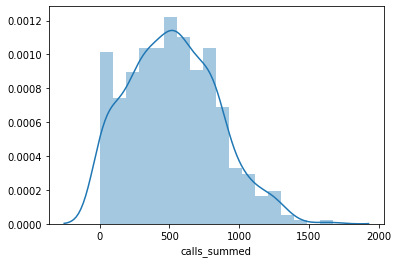

In [ ]:
sns_plot = sns.distplot(df_ultra['calls_summed'])
ultra_calls = sns_plot.get_figure()

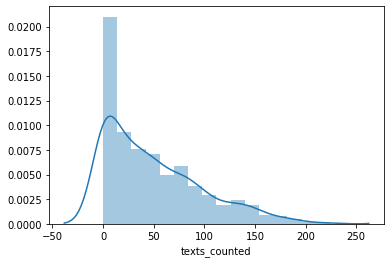

In [ ]:
sns_plot = sns.distplot(df_ultra['texts_counted'])
ultra_texts = sns_plot.get_figure()

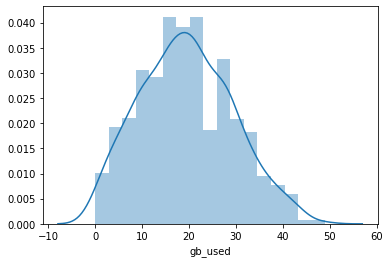

In [ ]:
sns_plot = sns.distplot(df_ultra['gb_used'])
ultra_gb = sns_plot.get_figure()

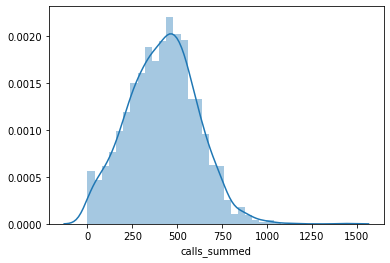

In [ ]:
sns_plot = sns.distplot(df_smart['calls_summed'])
smart_calls = sns_plot.get_figure()

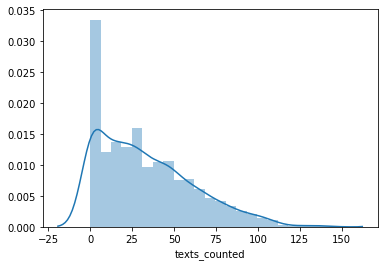

In [ ]:
sns_plot = sns.distplot(df_smart['texts_counted'])
smart_texts = sns_plot.get_figure()

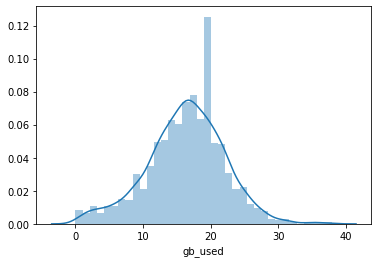

In [ ]:
sns_plot = sns.distplot(df_smart['gb_used'])
smart_gb = sns_plot.get_figure()

In [ ]:
print('среднее количество минут разговора: ', df_ultra['calls_summed'].mean()) #среднее количество минут разговора у абонентов ультра
variance = np.var(df_ultra['calls_summed'], ddof=1)
standard_deviation = np.std(df_ultra['calls_summed'], ddof=1)
print('стандартное отклонение: ',standard_deviation)
print('дисперсия: ',variance) 

среднее количество минут разговора:  526.0892494929006
стандартное отклонение:  317.8875485911392
дисперсия:  101052.49354928387


In [ ]:
print('среднее количество сообщений: ', df_ultra['texts_counted'].mean()) #среднее количество сообщений у абонентов ультра
variance_texts = np.var(df_ultra['texts_counted'], ddof=1)
standard_deviation_texts = np.std(df_ultra['texts_counted'], ddof=1)
print('стандартное отклонение: ', standard_deviation_texts)
print('дисперсия: ', variance_texts) 

среднее количество сообщений:  49.31338742393509
стандартное отклонение:  47.80603962530092
дисперсия:  2285.4174246558414


In [ ]:
print('среднее количество гб: ', df_ultra['gb_used'].mean()) #среднее количество траффика у абонентов ультра
variance_gb = np.var(df_ultra['gb_used'], ddof=1)
standard_deviation_gb = np.std(df_ultra['gb_used'], ddof=1)
print('стандартное отклонение: ', standard_deviation_gb)
print('дисперсия: ', variance_gb) 

среднее количество гб:  19.474645030425965
стандартное отклонение:  9.868056763624352
дисперсия:  97.37854429011234


In [ ]:
print('среднее количество минут разговора: ', df_smart['calls_summed'].mean()) #среднее количество минут разговора у абонентов смарт
variance_calls_smart = np.var(df_smart['calls_summed'], ddof=1)
standard_deviation_calls_smart = np.std(df_smart['calls_summed'], ddof=1)
print('стандартное отклонение: ', standard_deviation_calls_smart)
print('дисперсия: ', variance_calls_smart) 

среднее количество минут разговора:  417.747533632287
стандартное отклонение:  190.4767540579285
дисперсия:  36281.393836444586


In [ ]:
print('среднее количество сообщений: ', df_smart['texts_counted'].mean()) #среднее количество сообщений у абонентов смарт
variance_texts_smart = np.var(df_smart['texts_counted'], ddof=1)
standard_deviation_texts_smart = np.std(df_smart['texts_counted'], ddof=1)
print('стандартное отклонение: ', standard_deviation_texts_smart)
print('дисперсия: ', variance_texts_smart) 

среднее количество сообщений:  33.36905829596412
стандартное отклонение:  28.230395954185852
дисперсия:  796.955255730113


In [ ]:
print('среднее количество гб: ', df_smart['gb_used'].mean()) #среднее количество траффика у абонентов смарт
variance_gb_smart = np.var(df_smart['gb_used'], ddof=1)
standard_deviation_gb_smart = np.std(df_smart['gb_used'], ddof=1)
print('стандартное отклонение: ', standard_deviation_gb_smart)
print('дисперсия: ', variance_gb_smart) 

среднее количество гб:  16.32152466367713
стандартное отклонение:  5.7561665225657155
дисперсия:  33.133453035506285


Низкие значения стандартного отклонения говорят о том, что отдельные значения ближе к среднему. 
Высокие значения говорят нам о том, что отдельные наблюдения далеки от среднего значения данных.

Разброс значений в количестве сообщений и в минутах разговора обоих тарифов достаточно велико.

вывод: абоненты ультра больше звонят, пишут сообщений и используют больше гб мобильного интернета, чем абоненты смарт

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.

Нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.
Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

In [ ]:
alpha = .05 
sample_1 = df.query('city == "Москва"')['revenue']
sample_2 =df.query('city != "Москва"')['revenue']
results = st.ttest_ind(
    sample_1, 
    sample_2)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


Чтобы понять почему, ниже я привожу данные о количестве пользователей из Москвы и из других регионов. Так как пользователей из Москвы всего 611, то вывод верен: средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов.

In [ ]:
df_moscow = df.query('city == "Москва"')
df_moscow.info()
print(df_moscow['revenue'].mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 8 to 3124
Data columns (total 10 columns):
user_id          611 non-null int64
month            611 non-null object
calls_counted    611 non-null int64
calls_summed     611 non-null int64
texts_counted    611 non-null int64
age              611 non-null int64
city             611 non-null object
tariff           611 non-null object
gb_used          611 non-null int64
revenue          611 non-null int64
dtypes: int64(7), object(3)
memory usage: 52.5+ KB
1546.7135842880523


In [ ]:
df_others = df.query('city != "Москва"')
df_others.info()
print(df_others['revenue'].mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2605 entries, 0 to 3215
Data columns (total 10 columns):
user_id          2605 non-null int64
month            2603 non-null object
calls_counted    2605 non-null int64
calls_summed     2605 non-null int64
texts_counted    2605 non-null int64
age              2605 non-null int64
city             2605 non-null object
tariff           2605 non-null object
gb_used          2605 non-null int64
revenue          2605 non-null int64
dtypes: int64(7), object(3)
memory usage: 223.9+ KB
1524.7251439539348


Нулевая гипотеза: средняя выручка пользователей тарифа Ультра не отличается от средней выручки пользователей тарифа Смарт.
Альтернативная гипотеза: средняя выручка пользователей тарифа Ультра отличается от средй выручки пользователей тарифа Смарт.
Так как выборки разного размера (количество пользователей тарифа Смарт - 2230, тарифа Ультра - 986), то я введу параметр equal_var = False.

In [ ]:
alpha = .05 
sample_smart = df.query('tariff == "smart"')['revenue']
sample_ultra =df.query('tariff == "ultra"')['revenue']
results = st.ttest_ind(
    sample_smart, 
    sample_ultra,
    equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.927011394420941e-250
Отвергаем нулевую гипотезу


Вывод: средняя выручка пользователей тарифа Ультра отличается от средй выручки пользователей тарифа Смарт.

In [ ]:
print(df_ultra['revenue'].sum())

2041050


In [ ]:
print(df_smart['revenue'].sum())

2875901


In [ ]:
print(df_ultra['revenue'].mean())

2070.030425963489


In [ ]:
print(df_smart['revenue'].mean())

1289.6417040358745


Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вывод:

Тариф Смарт приносит больше денег: 
1) он достаточно дешевый, поэтому большее количество людей им пользуется (2230 против 986 у тарифа Ультра), в результате в сумме за 2018 год он принес больше денег компании, чем тариф Ультра 

2) ежемесячная плата составляет 550 р, при подсчете средней выручки пользователей тарифа Смарт получается, что каждый пользователей в среднем тратит около 1290 р в месяц, что составляет более 100% от ежемесяной платы (у тарифа Ультра при ежемесячно плате в 1950 р, средняя выручка составляет 2070 р)